0- [dogs] with total of 10 samples
1- [cats] with total of 12 samples


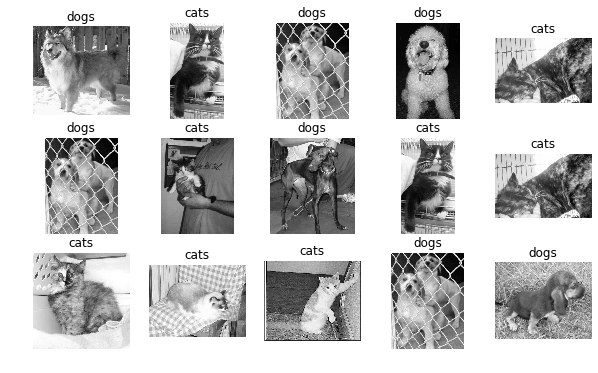

In [2]:
import numpy as np
import PML
from PIL import Image

#load samples
samples,labels=PML.load_img_dataset_from_folder("datasets/catsdogs/",grayscale=True)

#draw some random samples
PML.plot_random_images(samples,labels,3,5)

In [3]:
#kernel should be of size (3x3)
def conv2D(image,kernel):
    output=np.zeros_like(image)
    for x in range(image.shape[1]-2):
        for y in range(image.shape[0]-2):
            output[y,x]=max(0,min(255,(kernel*image[y:y+3,x:x+3]).sum()))
    return output

Applying on image index 8


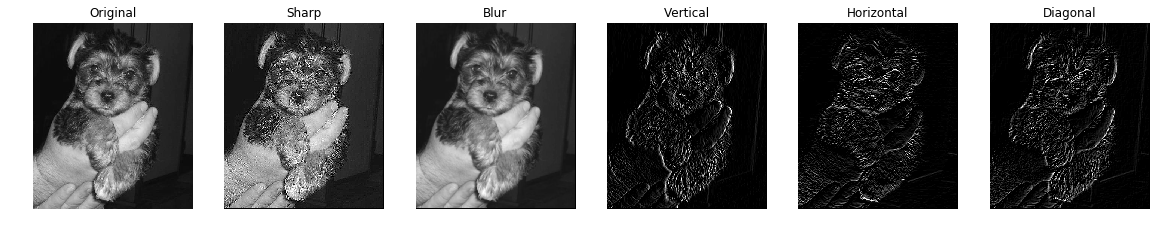

In [14]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

#pick a random image
index=random.randint(0,samples.shape[0]-1)
print("Applying on image index {0}".format(index))
#Sharp Filter
SharpKernel=np.array([[0,-1, 0],
                  [-1, 5, -1],
                  [0,-1, 0]])

#Blur Filter
BlurKernel=np.array([ [1,1, 1],
                      [1, 1, 1],
                      [1,1, 1]])/9.0

#Vertical Edge Detection
VertKernel=np.array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])

#Horizontal Edge Detection
HorKernel=np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

#Diagnoal Edge Detection
DiagonalKernel=np.array([[2,1,0],
                         [1,0,-1],
                         [0,-1,-2]])


Filters=[SharpKernel,BlurKernel,VertKernel,HorKernel,DiagonalKernel]
Types=["Sharp","Blur","Vertical","Horizontal","Diagonal"]

cols=len(Filters)+1
fig=plt.figure(figsize=(20,20*len(Filters)))
fig.add_subplot(1,cols,1)
plt.title("Original")
plt.axis('off')
plt.imshow(samples[index][0],cmap='gray')

for i,f in enumerate(Filters):
    conv=conv2D(samples[index][0],f)#apply convolution on image
    
    fig.add_subplot(1,cols,i+2)
    plt.title(Types[i])
    plt.axis('off')
    plt.imshow(conv,cmap='gray')
    
plt.savefig("kernels.png", bbox_inches='tight')
plt.show()